In [ ]:
#import libraries
import sys
import numpy as np
from PIL import Image
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
#encoding function
def Encode(src, message, dest):

    img = Image.open(src, 'r')
    width, height = img.size
    array = np.array(list(img.getdata()))

    if img.mode == 'RGB':
        n = 3
        m = 0
    elif img.mode == 'RGBA':
        n = 4
        m = 1

    total_pixels = array.size//n

    message += "$t3g0"
    b_message = ''.join([format(ord(i), "08b") for i in message])
    req_pixels = len(b_message)

    if req_pixels > total_pixels:
        print("ERROR: Need larger file size")

    else:
        index=0
        for p in range(total_pixels):
            for q in range(m, n):
                if index < req_pixels:
                    array[p][q] = int(bin(array[p][q])[2:9] + b_message[index], 2)
                    index += 1

        array=array.reshape(height, width, n)
        enc_img = Image.fromarray(array.astype('uint8'), img.mode)
        enc_img.save(dest)
        print("Image Encoded Successfully")


#decoding function
def Decode(src):

    img = Image.open(src, 'r')
    array = np.array(list(img.getdata()))

    if img.mode == 'RGB':
        n = 3
        m = 0
    elif img.mode == 'RGBA':
        n = 4
        m = 1

    total_pixels = array.size//n

    hidden_bits = ""
    for p in range(total_pixels):
        for q in range(m, n):
            hidden_bits += (bin(array[p][q])[2:][-1])

    hidden_bits = [hidden_bits[i:i+8] for i in range(0, len(hidden_bits), 8)]

    message = ""
    for i in range(len(hidden_bits)):
        if message[-5:] == "$t3g0":
            break
        else:
            message += chr(int(hidden_bits[i], 2))
    if "$t3g0" in message:
        print("Hidden Message:", message[:-5])
    else:
        print("No Hidden Message Found")

#main function
def Stego():
    print("--Welcome to $t3g0--")
    print("1: Encode")
    print("2: Decode")

    func = input()

    if func == '1':
        print("Enter Source Image Path")
        src = input()
        print("Enter Message to Hide")
        message = input()
        print("Enter Destination Image Path")
        dest = input()
        print("Encoding...")
        Encode(src, message, dest)

    elif func == '2':
        print("Enter Source Image Path")
        src = input()
        print("Decoding...")
        Decode(src)

    else:
        print("ERROR: Invalid option chosen")

Stego()


--Welcome to $t3g0--
1: Encode
2: Decode
1
Enter Source Image Path
/content/message_png.png
Enter Message to Hide
the password is abc
Enter Destination Image Path
/content/stegomessage_png.png
Encoding...
Image Encoded Successfully


In [ ]:
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
def ssimcal(img,stego):
  s=ssim(img,stego,multichannel= True)
  return s

In [ ]:
def mse(original, stego):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((original.astype("float") - stego.astype("float")) ** 2)
	err /= float(original.shape[0] * stego.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [ ]:
import cv2
from google.colab.patches import cv2_imshow 
carpng = cv2.imread('/content/carplate_png.png')
stegocarpng=cv2.imread('/content/stegocarplate_png.png')

ssim_carpng=ssimcal(carpng,stegocarpng)
mse_carpng=mse(carpng,stegocarpng)
print("SSIM value for png carplate image =",ssim_carpng)
print("mse value for png carplate image =",mse_carpng)

carjpeg = cv2.imread('/content/carplate_jpeg.jpeg')
stegocarjpeg=cv2.imread('/content/stegocarplate_jpeg.jpeg')

ssim_carjpeg=ssimcal(carjpeg,stegocarjpeg)
mse_carjpeg=mse(carjpeg,stegocarjpeg)
print("SSIM value for jpeg carplate image =",ssim_carjpeg)
print("mse value for jpeg carplate image =",mse_carjpeg)

#Lower the mse value more is the image similar
#Higher the ssim more is the image similar

SSIM value for png carplate image = 0.9999996654100421
mse value for png carplate image = 0.000448
SSIM value for jpeg carplate image = 0.9898157634165822
mse value for jpeg carplate image = 7.842528


In [ ]:
import cv2
from google.colab.patches import cv2_imshow 
lenapng = cv2.imread('/content/lena_png.png')
stegolenapng=cv2.imread('/content/stegolena_png.png')

ssim_lenapng=ssimcal(lenapng,stegolenapng)
mse_lenapng=mse(lenapng,stegolenapng)
print("SSIM value for png lena image =",ssim_lenapng)
print("mse value for png lena image =",mse_lenapng)

lenajpeg = cv2.imread('/content/lena_jpeg.jpeg')
stegolenajpeg=cv2.imread('/content/stegolena_jpeg.jpeg')

ssim_lenajpeg=ssimcal(lenajpeg,stegolenajpeg)
mse_lenajpeg=mse(lenajpeg,stegolenajpeg)
print("SSIM value for jpeg lena image =",ssim_lenajpeg)
print("mse value for jpeg lena image =",mse_lenajpeg)

#Lower the mse value more is the image similar
#Higher the ssim more is the image similar

SSIM value for png lena image = 0.999893914328497
mse value for png lena image = 3.7673301696777344
SSIM value for jpeg lena image = 0.9182974788454578
mse value for jpeg lena image = 61.36583709716797


In [ ]:
import cv2
from google.colab.patches import cv2_imshow 
messagepng = cv2.imread('/content/message_png.png')
stegomessagepng=cv2.imread('/content/stegomessage_png.png')

ssim_messagepng=ssimcal(messagepng,stegomessagepng)
mse_messagepng=mse(messagepng,stegomessagepng)
print("SSIM value for png message image =",ssim_messagepng)
print("mse value for png message image =",mse_messagepng)

messagejpeg = cv2.imread('/content/message_jpeg.jpeg')
stegomessagejpeg=cv2.imread('/content/stegomessage_jpeg.jpeg')

ssim_messagejpeg=ssimcal(messagejpeg,stegomessagejpeg)
mse_messagejpeg=mse(messagejpeg,stegomessagejpeg)
print("SSIM value for jpeg message image =",ssim_messagejpeg)
print("mse value for jpeg message image =",mse_messagejpeg)

#Lower the mse value more is the image similar
#Higher the ssim more is the image similar

SSIM value for png message image = 0.9995678504811286
mse value for png message image = 10.704702380952382
SSIM value for jpeg message image = 0.9957148317278738
mse value for jpeg message image = 9.983373015873015


In [ ]:
import pandas as pd
path="/content/MSE_comparison - Sheet1.csv"
df1=pd.read_csv(path)
print(df1)

     IMAGE TITLE  MSE_png  MSE_jpeg
0       carplate    28.47     36.09
1     lena_image    10.02     68.53
2  message_image    78.84     80.46


In [ ]:
import pandas as pd
path="/content/SSIM_comparison - Sheet1.csv"
df2=pd.read_csv(path)
print(df2)

  IMAGE TITLE  SSIM_png  SSIM_jpeg
0    carplate     0.990      0.980
1        lena     0.990      0.910
2     message     0.998      0.994


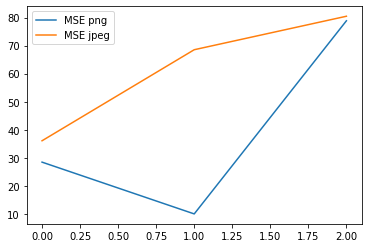

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df1['MSE_png'],label='MSE png')

plt.plot(df1['MSE_jpeg'],label='MSE jpeg')

plt.legend()
plt.show()

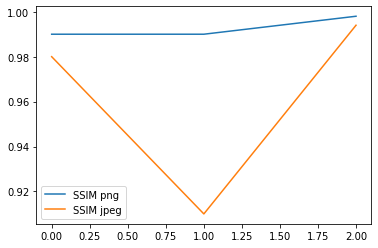

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df2['SSIM_png'],label='SSIM png')

plt.plot(df2['SSIM_jpeg'],label='SSIM jpeg')

plt.legend()
plt.show()